In [26]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
import seaborn as sns
from pathlib import Path
sns.set_style('darkgrid', {'legend.frameon':True})

In [27]:
import os
import sys
sys.path.append(str(Path(os.getcwd()).parent / 'middleware/middleware'))
from src.helpers import correct_encoding

In [28]:
df = pd.read_csv('data/exports/export_CR_PETCT-01012016.csv', sep='\t')
df['COMPTE_RENDU'] = df['COMPTE_RENDU'].apply(correct_encoding)
print(len(df))
df = df.dropna(subset=['COMPTE_RENDU'])
print(len(df))
df = df.drop_duplicates(subset=['COMPTE_RENDU'])
print(len(df))
df.describe()

52353
50147
43906


,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
count,43906,43906,43906,43906,43906,43906,43906
unique,43668,2,33,7,1245,688,43906
top,A10931446540,MN,TEP CORPS ENTIER,MBPET2,10/02/20,07:54,Installation répertoriée sous le n° M540008 Au...
freq,3,43905,35590,12090,51,134,1


In [29]:
df.head()

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
0,A10836454533,MN,TEP CORPS ENTIER,MBPET1,04/01/16,08:01,Installation répertoriée sous le n° M540008 Au...
1,A10844655173,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:16,Installation répertoriée sous le n° M540008 Au...
3,A10887608918,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:52,Installation répertoriée sous le n° M540008 Au...
4,A10886207618,MN,TEP CORPS ENTIER,MBPET1,04/01/16,10:31,Installation répertoriée sous le n° M540008 Au...
5,A10887615070,MN,TEP CORPS ENTIER,MBPET1,04/01/16,16:16,Installation répertoriée sous le n° M540008 Au...


In [30]:
for tag_to_delete in ['PANNE DE MACHINE', 'PAS D\'EXAMEN, PAS DE PRODUITS', 'EXAMEN ANNULE', 'PAS VENU', 'VENU, NON REALISE']:
    df = df.drop(index=df[df['LIBELLE_EXAMEN'] == tag_to_delete].index)
print(len(df))
df.describe()

43372


,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU
count,43372,43372,43372,43372,43372,43372,43372
unique,43138,2,28,7,1245,685,43372
top,A11289207025,MN,TEP CORPS ENTIER,MBPET2,10/03/20,07:54,Installation répertoriée sous le n° M540008 Au...
freq,3,43371,35590,11955,51,132,1


In [31]:
df['NUMERO_EXAMEN'].value_counts().value_counts()

1    42909
2      224
3        5
Name: NUMERO_EXAMEN, dtype: int64

In [32]:
df = df.drop_duplicates(subset=['NUMERO_EXAMEN'], keep=False)

In [33]:
df['LIBELLE_EXAMEN'].value_counts()

TEP CORPS ENTIER            35236
TEP DOPA                     2080
TEP CERVEAU                  1883
TEP CHOLINE                  1168
TEP  CHOLINE                  799
TEP AUTRE                     393
TEP DOTATOC                   370
TEP ORL                       334
TEP PELVIS                    259
TEP PSMA                      140
TEP NODULE                     82
TEP CERVEAU MAF                38
TEP MEMBRES INFERIEURS         33
TEP RADIOTHERAPIE              23
TEP FNA                        21
TEP CERVEAU Piramal            17
TEP PYL PSMA                   11
TEP DOTAMIR                     5
CONSULTATION MN                 4
TEP DOTA RIV                    3
TEP CAPRI                       2
TEP ACQ DYNAMIQUE               2
TEP DOTATOC RIV                 1
TEP CERVEAU TARDIF AZET         1
INJ TEP                         1
TEP DOPA RIV                    1
TEP CERVEAU PRECOCE AZET        1
TEP CORPS ENTIER FES            1
Name: LIBELLE_EXAMEN, dtype: int64

In [34]:
df['year'] = df['DATE_EXAMEN'].apply(lambda x: x.split('/')[-1])
df['month'] = df['DATE_EXAMEN'].apply(lambda x: x.split('/')[1])
df.head()

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU,year,month
0,A10836454533,MN,TEP CORPS ENTIER,MBPET1,04/01/16,08:01,Installation répertoriée sous le n° M540008 Au...,16,01
1,A10844655173,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:16,Installation répertoriée sous le n° M540008 Au...,16,01
3,A10887608918,MN,TEP CORPS ENTIER,MBPET1,04/01/16,14:52,Installation répertoriée sous le n° M540008 Au...,16,01
4,A10886207618,MN,TEP CORPS ENTIER,MBPET1,04/01/16,10:31,Installation répertoriée sous le n° M540008 Au...,16,01
5,A10887615070,MN,TEP CORPS ENTIER,MBPET1,04/01/16,16:16,Installation répertoriée sous le n° M540008 Au...,16,01


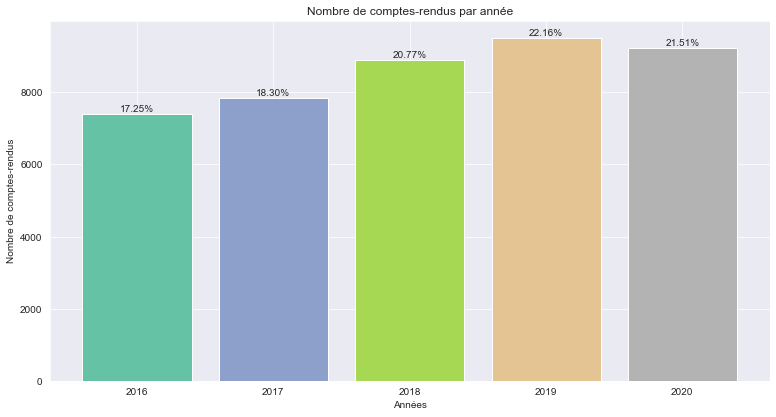

In [35]:
years = df['year'].value_counts().sort_index()
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
bar = ax.bar(
    [f'20{y}' for y in years.index],
    years.values,
    color=cm.Set2(np.linspace(0, 1, num=len(years))))
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height/len(df)*100:.2f}%', ha='center', va='bottom')

ax.set_title('Nombre de comptes-rendus par année')
ax.set_ylabel('Nombre de comptes-rendus')
ax.set_xlabel('Années')
plt.show()

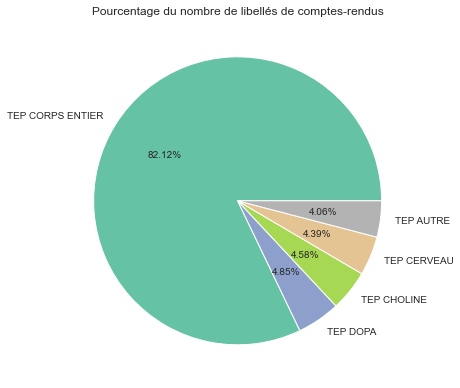

In [36]:
tags = df['LIBELLE_EXAMEN'].apply(lambda x: x.replace('  ', ' ')).value_counts().sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.pie(
   list(tags[:4].values) + [tags[4:].values.sum()], 
    labels = list(tags[:4].index) + ['TEP AUTRE'],
    colors=cm.Set2(np.linspace(0, 1, num=len(years))),
    autopct='%1.2f%%')
ax.set_title('Pourcentage du nombre de libellés de comptes-rendus')

plt.show()

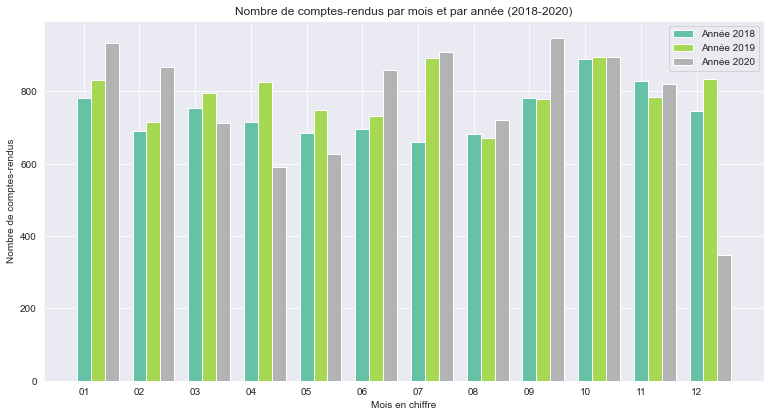

In [37]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

months_years = df.groupby('month')['year']
years = df['year'].unique()[2:]
months = list(months_years.groups.keys())
colors = cm.Set2(np.linspace(0, 1, num=len(years)))
vc = months_years.value_counts()
X = np.arange(len(months))
bar_width = 1 / (len(years) + 1)

for i, y in enumerate(years):
    bar = ax.bar(
        X + i * bar_width,
        vc[:, y],
        color=colors[i],
        width = bar_width)

ax.set_title('Nombre de comptes-rendus par mois et par année (2018-2020)')
ax.set_ylabel('Nombre de comptes-rendus')
ax.set_xlabel('Mois en chiffre')
ax.set_xticks(X)
ax.set_xticklabels(months)
ax.legend(labels=[f'Année 20{y}' for y in years])

plt.show()

In [38]:
print("\n\n****************\n\n".join(list(df.head()['COMPTE_RENDU'])))

Installation répertoriée sous le n° M540008 Autorisation CODEP-STR-2014-030180					
BIOGRAPH DUO année 2002 N° identification 36159 de marque SIEMENS 
CC

Madame et Cher Consoeur, 

Nous vous remercions de nous avoir adressé Madame JACQUEL Chantal, née le 23/09/1959 (56 ans), pour la réalisation, le 04/01/2016, d'une tomoscintigraphie par émission de positons au FDG (Morpho-TEP). 

Contexte dans lequel l'étude est réalisée :
Bilan de réévaluation d'un adénocarcinome utérin traité par radio-chimiothérapie, curiethérapie et chirurgie en 2013, compliqué d'une fibrose rétro péritonéale traitée par sonde JJ. Précédent Morpho-TEP du 06/08/2015 : présence d'une lésion hypermétabolique de siège iliaque interne gauche (collection). 

Technique de l'examen :
Les acquisitions ont été débutées 65 minutes  après injection de 515 MBq de 18FDG. 
La glycémie lors de l'injection était de 94 mg/dl.
CTDI : 9,38 mGy - DLP : 850 mGy.cm
Injection de FLUROSEMIDE 10 mg (n° lot AY051)

Cet examen apporte les i

In [39]:
r_name = re.compile(r"(monsieur|madame|mademoiselle|mr|enfant|m\.|mlle)([\w\s]+),\s*née*\sle\s([0-9]{2}/[0-9]{2}/[0-9]{4})", re.I)
def anonymize(x):
    x = x.replace(u'\xa0', u' ')
    name = r_name.search(x)
    if not name:
        return 0
    lastname = " ".join([s for s in name.groups()[1].strip().split() if s.isupper()])
    lastnames = re.findall(rf"{lastname}", x, re.I)
    date = name.groups()[2]
    dates = re.findall(rf"{date}", x, re.I)
    if len(lastnames) != 1 or len(dates) != 1:
        print(f"{dates}, {lastname}, {lastnames}")
        return 1
    x = x[:name.start(3)] + 'xxxx' + x[name.end(3):]
    x = x[:name.start(2)] + ' XXXX xxxx' + x[name.end(2):]
    return x
# print(df[df['COMPTE_RENDU'].apply(anonymize).isna()]['COMPTE_RENDU'].values[0])
df['cr_an'] = df['COMPTE_RENDU'].apply(anonymize)

['16/06/1950'], PAYSANT, ['PAYSANT', 'PAYSANT']
['01/07/1952'], PETITJEAN, ['PETITJEAN', 'PETITJEAN']
['12/04/1954'], MOHR, ['MOHR', 'MOHR']
['16/02/1948'], JUNG, ['JUNG', 'JUNG']
['25/03/1956'], KROLAK, ['KROLAK', 'KROLAK']
['28/11/1932'], MATHIEU, ['MATHIEU', 'MATHIEU']
['03/01/1963'], ROCCHIA, ['ROCCHIA', 'ROCCHIA']
['20/09/1937'], GRUSELLE, ['gruselle', 'GRUSELLE']
['03/03/1940'], BORN, ['BORN', 'BORN']
['31/07/1946'], VOLL, ['VOLL', 'VOLL']
['13/07/1954'], BRUCKER, ['BRUCKER', 'BRUCKER']
['15/11/1928'], PIERRON, ['PIERRON', 'PIERRON']
['25/05/1987'], MAUCOURT, ['MAUCOURT', 'MAUCOURT']
['15/09/1943'], PIGNART, ['PIGNART', 'PIGNART']
['26/03/1937'], HAOURY, ['HAOURY', 'HAOURY']
['19/12/1945'], STARCK, ['STARCK', 'STARCK']
['04/09/1934'], ROOSZ, ['ROOSZ', 'ROOSZ']
['17/11/1950'], ALVES, ['ALVES', 'ALVES']
['16/04/1982'], PASQUOTTO, ['PASQUOTTO', 'PASQUOTTO']
['30/11/1938'], GREIN, ['GREIN', 'GREIN']
['07/04/1953'], CLOUZEAU, ['CLOUZEAU', 'CLOUZEAU']
['01/11/1969'], TUZI, ['TUZI', 'TU

['03/01/1949'], JACQUIN, ['JACQUIN', 'JACQUIN']
['02/01/1966'], TAN, ['TAN', 'tan']
['23/09/1952'], OHNIMUS, ['OHNIMUS', 'OHNIMUS']
['12/07/1959'], CAMMARATA, ['CAMMARATA', 'CAMMARATA']
['05/04/1932'], BARTON, ['BARTON', 'BARTON']
['30/05/1937'], PERRIN, ['PERRIN', 'PERRIN']
['28/12/1946'], BLOND, ['BLOND', 'BLOND']
['22/11/1936'], PETIT, ['PETIT', 'petit', 'petit', 'petit', 'petit']
['19/06/1944'], BOUR, ['BOUR', 'BOUR']
['09/01/1958'], GROSJEAN, ['GROSJEAN', 'GROSJEAN']
['27/08/1938'], CHRISTOPHE, ['CHRISTOPHE', 'CHRISTOPHE']
['20/02/1939'], GENIN, ['GENIN', 'GENIN']
['11/04/1934'], HILAIRE, ['HILAIRE', 'hilaire', 'hilaire']
['17/03/1939'], PIERRE, ['PIERRE', 'PIERRE']
['30/10/1950'], SCHELTIEN, ['SCHELTIEN', 'SCHELTIEN']
['17/01/1941'], LEROUX, ['LEROUX', 'LEROUX']
['13/01/1974'], MATI, ['MATI', 'mati']
['01/01/1960'], ROBERT, ['ROBERT', 'ROBERT']
['03/12/1947'], MATHIEU, ['MATHIEU', 'Mathieu']
['22/06/1942'], FORT, ['FORT', 'Fort']
['28/07/1953'], PETIT, ['PETIT', 'PETIT', 'petit',

['17/01/1959'], ANTOINE, ['ANTOINE', 'Antoine']
['11/07/1954'], STREIFF, ['STREIFF', 'STREIFF']
['30/08/1957'], SANNA, ['SANNA', 'SANNA']
['26/07/1934'], BARYGA, ['BARYGA', 'BARYGA']
['16/05/1962'], MICHE, ['MICHE', 'Miche']
['28/12/1957'], EFFERTZ, ['EFFERTZ', 'EFFERTZ']
['08/11/1952'], PIUSINSKI, ['Piusinski', 'PIUSINSKI']
['02/12/1946'], FROHLING, ['FROHLING', 'FROHLING']
['20/10/1959'], BRANCA, ['BRANCA', 'BRANCA']
['24/04/1950'], HO, ['HO', 'ho', 'ho', 'ho']
['01/05/1958'], ROCHE, ['ROCHE', 'ROCHE']
['25/11/1946'], WANG, ['WANG', 'WANG']
['24/08/1950'], KOWNATOR, ['KOWNATOR', 'KOWNATOR']
['03/02/1963'], PETIT, ['PETIT', 'petit']
['07/02/1958'], CHEVALIER, ['CHEVALIER', 'CHEVALIER']
['24/06/1962'], DAVID, ['DAVID', 'DAVID']
['20/06/1956'], PIENTO, ['PIENTO', 'PIENTO']
['22/11/1933'], MONGEY, ['MONGEY', 'MONGEY']
['05/03/1945'], PONS, ['PONS', 'pons']
['09/05/1999'], MARIN, ['MARIN', 'Marin']
['07/09/1938'], MASSE, ['MASSE', 'masse', 'Masse', 'Masse']
['15/10/1943'], DEMIMUID, ['Dem

['02/12/1967'], DOERR, ['DOERR', 'DOERR']
['03/10/1952'], BAHOFF, ['BAHOFF', 'BAHOFF']
['15/01/1930'], SANCASSANI, ['SANCASSANI', 'SANCASSANI']
['02/07/1981'], MARCEAN, ['MARCEAN', 'MARCEAN']
['31/12/1939'], FARROUJI M, ['FARROUJI M', 'FARROUJI M']
['05/12/1950', '05/12/1950'], PRENAT, ['PRENAT', 'PRENAT']
['01/05/1949', '01/05/1949'], DEVEYCX, ['DEVEYCX', 'DEVEYCX']
['01/03/1932'], GIELNIAK, ['GIELNIAK', 'GIELNIAK']
['16/01/1959'], PERROT, ['PERROT', 'PERROT']
['21/01/1996'], PINOT, ['PINOT', 'PINOT']
['09/02/1967'], FATALOT, ['FATALOT', 'FATALOT']
['29/07/1958'], BEDEL, ['BEDEL', 'BEDEL']
['12/04/1950'], QUENETTE, ['QUENETTE', 'QUENETTE']
['31/03/1982'], LAUTAR, ['LAUTAR', 'LAUTAR']
['27/04/1962'], VAZ, ['VAZ', 'VAZ']
['27/11/1985'], PETRAZOLLER, ['Petrazoller', 'PETRAZOLLER']
['30/04/1974'], ME, ['me', 'me', 'me', 'ME', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me', 'me']
['07/12/1946'], PIERRE, ['PIERRE', 'PIERRE']
['17/04/1986'], ZOGLIA, ['ZOGLIA', 'ZOGLIA']
['0

['13/11/1968'], DELAHOUSSE, ['Delahousse', 'DELAHOUSSE']
['25/09/1949'], HOWALD, ['HOWALD', 'HOWALD', 'HOWALD', 'HOWALD']
['29/09/1956'], HERRY, ['HERRY', 'HERRY']
['04/01/1963'], GRANGE, ['GRANGE', 'GRANGE', 'GRANGE']
['11/07/1951'], ESPERANDIEU, ['ESPERANDIEU', 'ESPERANDIEU', 'ESPERANDIEU']
['25/01/1958'], ROLIN, ['ROLIN', 'rolin']
['25/09/1965'], PLA, ['PLA', 'pla']
['11/12/1977'], MACEL, ['macel', 'MACEL']
['08/06/1953'], LEONE, ['LEONE', 'LEONE']
['14/04/1975'], OTIASHVILI, ['OTIASHVILI', 'OTIASHVILI']
['17/09/1948'], CONGE, ['CONGE', 'Conge']
['27/09/1956'], SERT, ['SERT', 'SERT']
['30/11/1958'], LALLEMENT, ['LALLEMENT', 'LALLEMENT']
['17/07/1947'], CASTEX, ['CASTEX', 'CASTEX']
['03/07/1947'], MUSQUIN, ['MUSQUIN', 'MUSQUIN']
['20/11/1959'], SO, ['so', 'SO', 'so']
['08/02/1959'], IANNAZZI, ['IANNAZZI', 'IANNAZZI']
['14/02/1971'], EVRARD, ['EVRARD', 'EVRARD', 'EVRARD']
['17/12/1961'], LOR, ['LOR', 'lor']
['06/06/1952'], BORR, ['borr', 'BORR']
['05/06/1963'], GUITTONNEAU, ['GUITTONN

['27/02/1949'], DALIER, ['DALIER', 'DALIER']
['22/10/1954'], LOUIS, ['LOUIS', 'LOUIS']
['13/02/1968'], ADAM, ['adam', 'ADAM']
['05/12/1937'], MAIRE, ['MAIRE', 'maire']
['14/02/1950'], JOLIVALT, ['JOLIVALT', 'JOLIVALT']
['15/11/1972'], WURTZ, ['WURTZ', 'WURTZ']
['15/07/1947'], HILLENBLINK, ['HILLENBLINK', 'HILLENBLINK']
['13/05/1938'], CUNY, ['CUNY', 'CUNY']
['15/12/1951'], FASSELLA, ['FASSELLA', 'FASSELLA']
['10/08/1941'], FERCHAUD, ['FERCHAUD', 'FERCHAUD']
['06/06/1948'], WILMOUTH, ['WILMOUTH', 'WILMOUTH']
['13/07/1939'], AHRENS, ['AHRENS', 'AHRENS']
['15/11/1984'], KIEFFER, ['KIEFFER', 'KIEFFER']
['02/01/1966'], GOEDERT, ['GOEDERT', 'GOEDERT']
['13/02/1994'], ADAM, ['adam', 'ADAM']
['01/02/1963'], FLAUSS, ['FLAUSS', 'FLAUSS']
['16/11/1940'], BOCQUEL, ['BOCQUEL', 'BOCQUEL']
['16/10/1954'], BOBADILLA, ['BOBADILLA', 'BOBADILLA']
['12/06/1984'], HANOTIN, ['HANOTIN', 'HANOTIN']
['24/07/1981'], BEAUSEROY, ['BEAUSEROY', 'BEAUSEROY']
['18/11/1934'], FREYERMUTH, ['Freyermuth', 'FREYERMUTH']
[

In [40]:
missings = []
founded = []
group_lens = []

dfgb_year = df.groupby('year')
years = list(dfgb_year.groups.keys())

for k in years:
    group = dfgb_year.get_group(k)
    group_lens.append(len(group))
    missings.append(len(group[group['cr_an'] == 0]))    
    founded.append(len(group[group['cr_an'] == 1]))

group_lens = np.array(group_lens)    
missings = np.array(missings)
founded = np.array(founded)
years = [f'20{y}' for y in years]

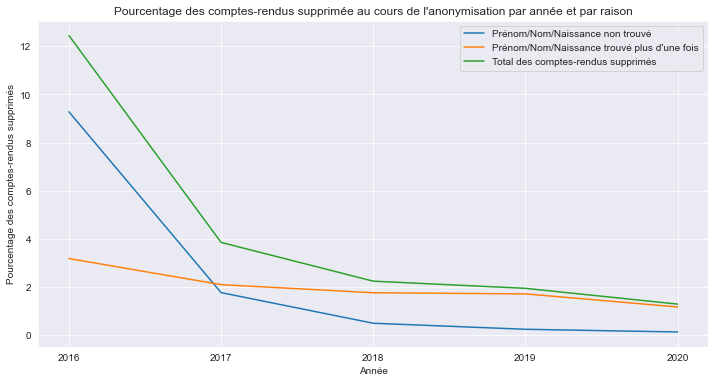

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(years, missings / group_lens * 100, label='Prénom/Nom/Naissance non trouvé')
ax.plot(years, founded / group_lens * 100, label='Prénom/Nom/Naissance trouvé plus d\'une fois')
ax.plot(years, (missings + founded) / group_lens * 100, label='Total des comptes-rendus supprimés')
plt.grid()
ax.set(xlabel='Année', ylabel='Pourcentage des comptes-rendus supprimés',
       title='Pourcentage des comptes-rendus supprimée au cours de l\'anonymisation par année et par raison')
ax.grid()
ax.legend()  
plt.show()

In [42]:
print("\n\n****************\n\n".join(list(df.head()['COMPTE_RENDU'])))

Installation répertoriée sous le n° M540008 Autorisation CODEP-STR-2014-030180					
BIOGRAPH DUO année 2002 N° identification 36159 de marque SIEMENS 
CC

Madame et Cher Consoeur, 

Nous vous remercions de nous avoir adressé Madame JACQUEL Chantal, née le 23/09/1959 (56 ans), pour la réalisation, le 04/01/2016, d'une tomoscintigraphie par émission de positons au FDG (Morpho-TEP). 

Contexte dans lequel l'étude est réalisée :
Bilan de réévaluation d'un adénocarcinome utérin traité par radio-chimiothérapie, curiethérapie et chirurgie en 2013, compliqué d'une fibrose rétro péritonéale traitée par sonde JJ. Précédent Morpho-TEP du 06/08/2015 : présence d'une lésion hypermétabolique de siège iliaque interne gauche (collection). 

Technique de l'examen :
Les acquisitions ont été débutées 65 minutes  après injection de 515 MBq de 18FDG. 
La glycémie lors de l'injection était de 94 mg/dl.
CTDI : 9,38 mGy - DLP : 850 mGy.cm
Injection de FLUROSEMIDE 10 mg (n° lot AY051)

Cet examen apporte les i

In [43]:
sample = df.drop(df[df['cr_an'] == 0].index)
print(f"{len(sample)}, {len(df)}, {len(df) - len(sample)}, {(len(df) - len(sample)) / len(df) * 100:.3f}, {len(sample) / len(df) * 100:.3f}")

42008, 42909, 901, 2.100, 97.900


In [44]:
sample = sample.drop(sample[sample['cr_an'] == 1].index)
print(f"{len(sample)}, {len(df)}, {len(df) - len(sample)}, {(len(df) - len(sample)) / len(df) * 100:.3f}, {len(sample) / len(df) * 100:.3f}")

41184, 42909, 1725, 4.020, 95.980


In [45]:
sample[sample['cr_an'] == '1']

,NUMERO_EXAMEN,TYPE_EXAMEN,LIBELLE_EXAMEN,NUM_SALLE,DATE_EXAMEN,HEURE_EXAMEN,COMPTE_RENDU,year,month,cr_an


In [46]:
sample.to_csv('data/exports/export_CR_PETCT-01012016_an.csv', '\t', index=False)